## Watershed Algo
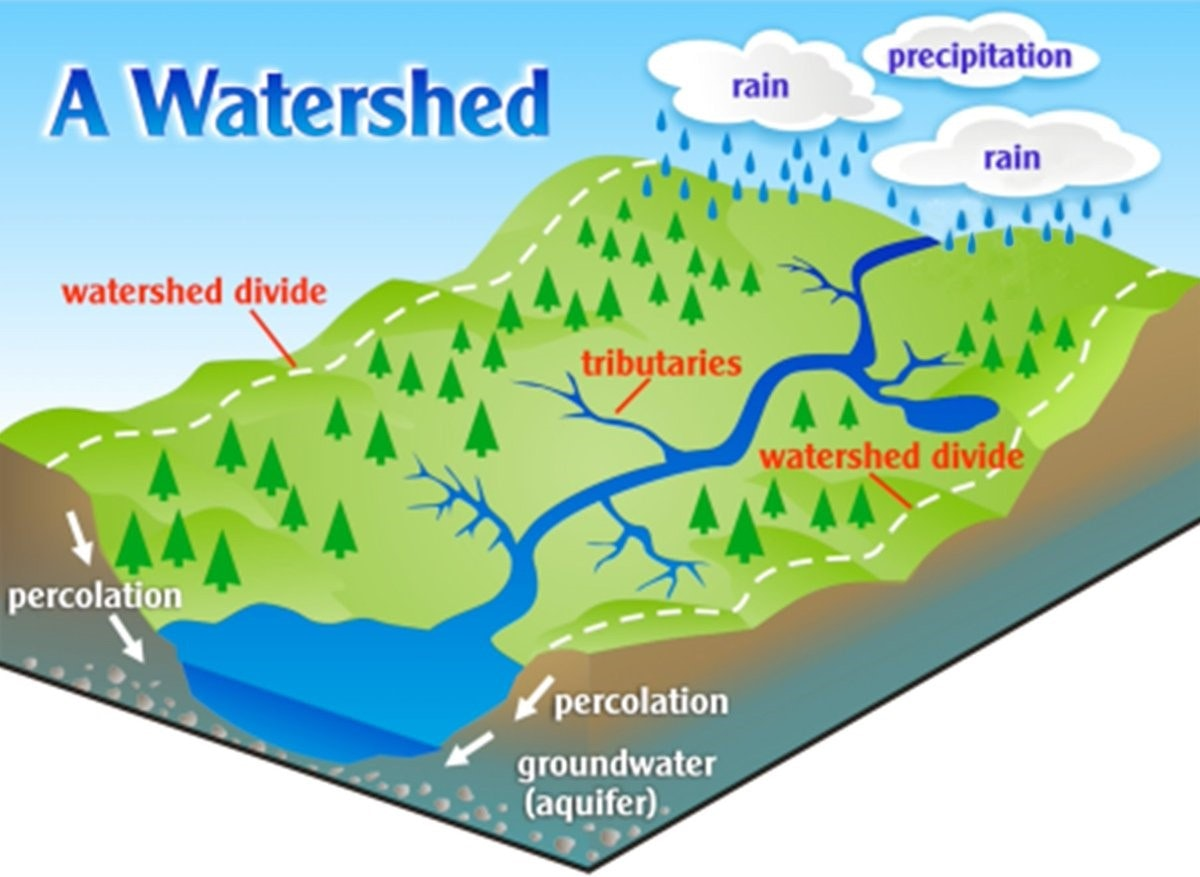 

In geo, watershed is a land aread that channels rainfall and snowmelt to streams, rivers and eventually to outflow poitns such as reservoirs, bays, and the ocean. These can be segmented using topographical maps with boundaries. 
This algo treats the image it operate upon like a topographic map with the brightness of each point representing it's height, and bordering with the lines.

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Create colors for markers
from matplotlib import cm
%matplotlib inline

In [9]:
# Read the image
build = cv2.imread("D:/jupyter/CV/Computer-Vision-with-Python/DATA/building_sky.jpg")
build_copy = np.copy(build) # To play around with image

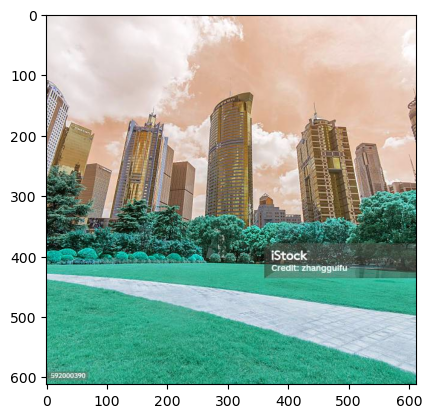

In [10]:
plt.imshow(build)

In [4]:
# Create an empty space for the results to be drawn on
build.shape[:2]

(612, 612)

In [11]:
marker_image = np.zeros(build.shape[:2],dtype=np.int32)
segments = np.zeros(build.shape,dtype=np.uint8)

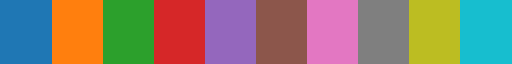

In [6]:
cm.tab10

In [12]:
# Input the color
def create_rgb(i):
    # :3 are RGB and multiply by 255
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

# Save all the colors in an empty list of colors 
colors = []

# One color for each single digit
for i in range(10): # 10 because tab10
    colors.append(create_rgb(i))

In [8]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [13]:
### Setting up callback function
# Global variable
# Numbers 0-9
n_markers = 10
# Color choice
current_marker = 1
# Markers updated by watershed
marks_update = False

In [14]:
# Callback Function
def mouse_callback(event, x, y, flags, param):
    # it will pass by while true loop
    global marks_update
    # When mouse left button is pressed
    if event == cv2.EVENT_LBUTTONDOWN:

        # Tracking for markers watershed algo
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)

        # Display on use image
        cv2.circle(build_copy, (x, y), 10, colors[current_marker], -1)
        marks_update = True

In [ ]:
# Name the window
cv2.namedWindow("Building Image")
cv2.setMouseCallback("Building Image", mouse_callback)

# White True
while True:
    # Show the 2 windows
    cv2.imshow("WaterShed segments", segments) # 3D 
    cv2.imshow("Building Image", build_copy) # 3D

    # Close everything if Esc is pressed
    k = cv2.waitKey(1)
    if k == 27:
        break

    # Clear All the colors when C is pressed
    elif k == ord("c"):
        build_copy = build.copy() # Reset
        marker_image = np.zeros(build.shape[0:2], dtype = np.int32) # Reset
        segments = np.zeros(build.shape, dtype = np.uint8) # Reset
        
    # Updae color choice
    elif k > 0 and chr(k).isdigit():
        # Chr converts to printable digit
        current_marker  = int(chr(k))

     # If we clicked somewhere, call the watershed algorithm on our chosen markers
    if marks_update:
        # pass the copy of marker_image to watershed algo
        marker_image_copy = marker_image.copy()
        cv2.watershed(build, marker_image_copy)

        # new segment
        segments = np.zeros(build.shape, dtype = np.uint8)

        # use 
        for color_ind in range(n_markers):
            # Color seg, numpy call
            segments[marker_image_copy == (color_ind)] = colors[color_ind]

        marks_update = False
        
cv2.destroyAllWindows()

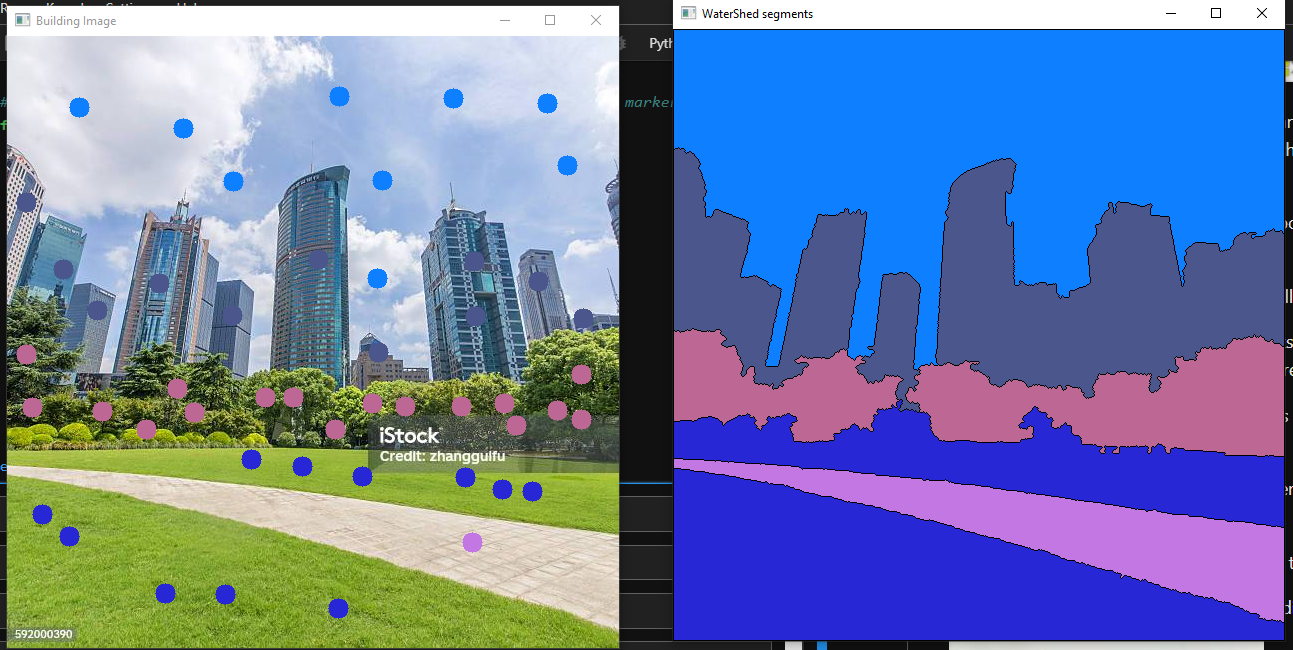